<a href="https://colab.research.google.com/github/rifqiabyy/Machine-Learning/blob/main/week%208%20ML/tugas_week_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Support Vector Machines (SVM)

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

Example of SVM Classification: Maximum Margin Separating Hyperplane Programs

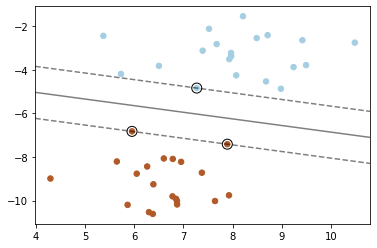

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=40, centers=2, random_state=6)
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
ax.contour(
    XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

**Credit card dataset: SVM Classification**

In [ ]:
import pandas as pd 
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm
import itertools
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn

%matplotlib inline

In [ ]:
data = pd.read_csv('creditcard.csv')
df = pd.DataFrame(data)
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,19898.000000,19898.000000,19898.000000,19898.000000,19898.000000,19898.000000,19898.000000,19898.000000,19898.000000,19898.000000,...,19897.000000,19897.000000,19897.000000,19897.000000,19897.000000,19897.000000,19897.000000,19897.000000,19897.000000,19897.000000
mean,15492.416374,-0.244326,0.242420,0.745774,0.277011,-0.163264,0.092881,-0.145279,0.022237,0.636382,...,-0.047949,-0.146461,-0.038093,0.010678,0.122924,0.033127,0.014454,0.007312,70.271100,0.004272
std,10512.066686,1.889986,1.527342,1.767726,1.466218,1.430821,1.331029,1.338260,1.346813,1.278839,...,0.828385,0.637567,0.520683,0.591180,0.437675,0.530315,0.393002,0.244372,205.363789,0.065222
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-32.092129,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.728650,-7.495741,-1.338556,-8.567638,-3.575312,0.000000,0.000000
25%,4536.250000,-0.959632,-0.329008,0.309235,-0.636713,-0.745156,-0.657306,-0.599403,-0.171779,-0.209565,...,-0.259497,-0.563992,-0.174213,-0.333314,-0.138325,-0.341917,-0.069146,-0.010879,5.750000,0.000000
50%,14796.000000,-0.302521,0.220079,0.898672,0.224608,-0.199377,-0.175434,-0.072254,0.023822,0.620176,...,-0.115398,-0.118803,-0.046994,0.061181,0.160495,-0.036546,0.003868,0.019083,16.000000,0.000000
75%,26220.500000,1.164473,0.870117,1.532922,1.142143,0.341367,0.486735,0.448572,0.279960,1.409142,...,0.049521,0.254057,0.073666,0.398549,0.400713,0.332729,0.096281,0.077551,59.980000,0.000000
max,30633.000000,1.960497,16.713389,4.101716,11.927512,34.099309,21.393069,34.303177,20.007208,10.392889,...,22.614889,5.805795,13.876221,3.695503,5.525093,3.517346,8.254376,4.860769,7879.420000,1.000000


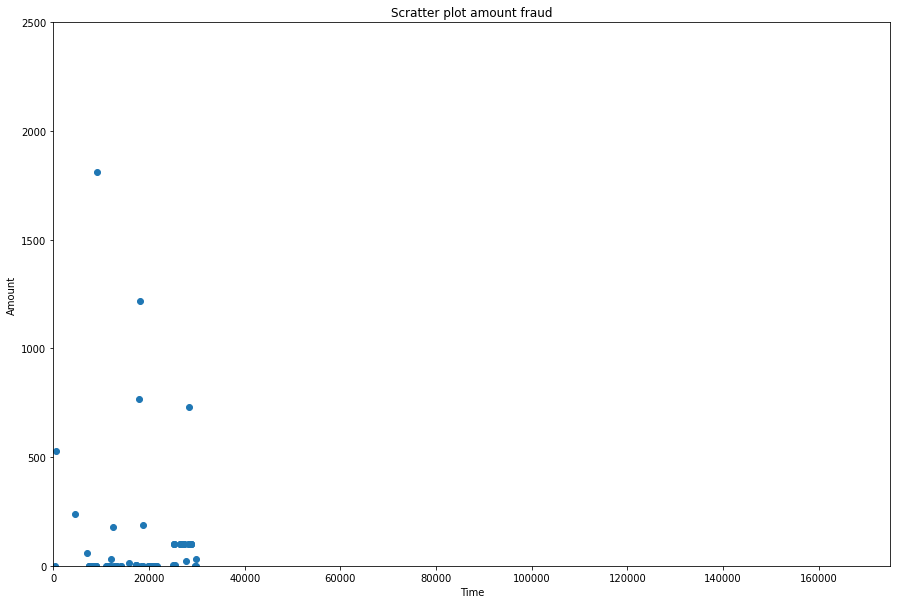

In [ ]:
df_fraud = df[df['Class'] == 1] 
plt.figure(figsize=(15,10))
plt.scatter(df_fraud['Time'], df_fraud['Amount']) 
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

In [ ]:
nb_big_fraud = df_fraud[df_fraud['Amount'] > 1000].shape[0] # Recovery of frauds over 1000
print('There are only '+ str(nb_big_fraud) + ' frauds where the amount was bigger than 1000 over ' + str(df_fraud.shape[0]) + ' frauds')

There are only 2 frauds where the amount was bigger than 1000 over 85 frauds


In [ ]:
# Unbalence data
number_fraud = len(data[data.Class == 1])
number_no_fraud = len(data[data.Class == 0])
print('There are only '+ str(number_fraud) + ' frauds in the original dataset, even though there are ' + str(number_no_fraud) +' no frauds in the data')

There are only 85 frauds in the original dataset, even though there are 19812 no frauds in the data


In [ ]:
print("The accuracy of the classifier then would be : "+ str((284315-492)/284315)+ " which is the number of good classification over the number of tup")

The accuracy of the classifier then would be : 0.998269524998681 which is the number of good classification over the number of tup


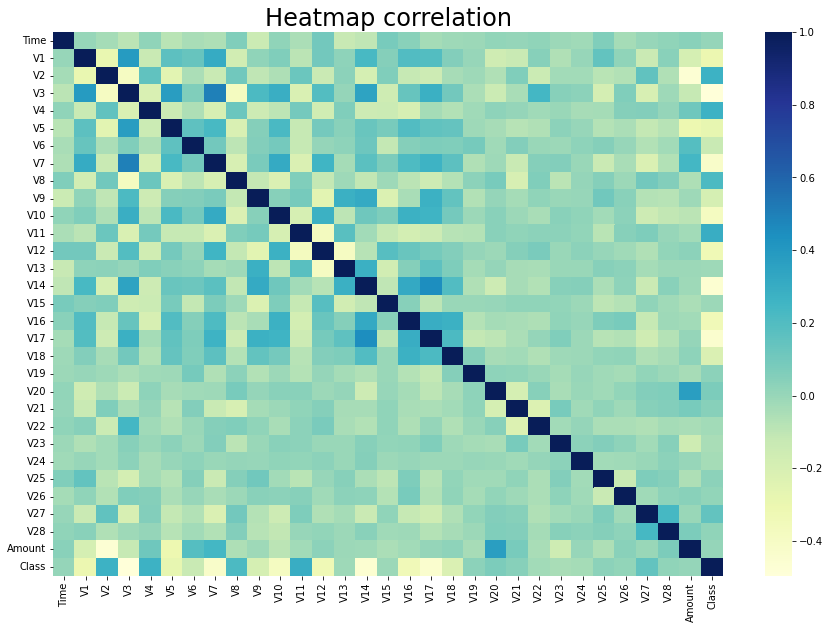

In [ ]:
df_corr = df.corr() 

plt.figure(figsize=(15,10))
seaborn.heatmap(df_corr, cmap="YlGnBu") # Displaying the Heatmap
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

In [ ]:
rank = df_corr['Class'] 
df_rank = pd.DataFrame(rank) 

# Ranking the absolute values of the coefficientsin descending order
df_rank = np.abs(df_rank).sort_values(by='Class',ascending=False) 

# Removing Missing Data (not a number)
df_rank.dropna(inplace=True)

In [ ]:
df_train_all = df[0:150000] 

# Seperate the data which are the frauds and the no frauds
df_train_1 = df_train_all[df_train_all['Class'] == 1] 
df_train_0 = df_train_all[df_train_all['Class'] == 0]
print('In this dataset, we have ' + str(len(df_train_1)) +" frauds so we need to take a similar number of non-fraud")

df_sample=df_train_0.sample(300)

# Gather the frauds with the no frauds.
df_train = df_train_1.append(df_sample)  
# Mix dataset
df_train = df_train.sample(frac=1)

In this dataset, we have 85 frauds so we need to take a similar number of non-fraud


In [ ]:
X_train = df_train.drop(['Time', 'Class'],axis=1)

# Create our label
y_train = df_train['Class'] 
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [ ]:
df_test_all = df[150000:]

X_test_all = df_test_all.drop(['Time', 'Class'],axis=1)
y_test_all = df_test_all['Class']
X_test_all = np.asarray(X_test_all)
y_test_all = np.asarray(y_test_all)

In [ ]:
X_train_rank = df_train[df_rank.index[1:11]] 
X_train_rank = np.asarray(X_train_rank)

X_test_all_rank = df_test_all[df_rank.index[1:11]]
X_test_all_rank = np.asarray(X_test_all_rank)
y_test_all = np.asarray(y_test_all)

In [ ]:
class_names=np.array(['0','1'])

In [ ]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
classifier = svm.SVC(kernel='linear') 

# Then we train our model, with our balanced data train.
classifier.fit(X_train, y_train)

SVC(kernel='linear')